# Regressão Logística

## Dataset de Previsão e Detecção de Risco de Crédito

Variável target ou classe:<br />
credit.rating<br />
1 - concedeu crédito<br />
0 - não concedeu crédito

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [2]:
df = pd.read_csv('credit_dataset_final.csv')
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


Variável target ou classe:<br />
credit.rating<br />
1 - concedeu crédito<br />
0 - não concedeu crédito

In [3]:
df.columns[1:]

Index(['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose', 'credit.amount',
       'savings', 'employment.duration', 'installment.rate', 'marital.status',
       'guarantor', 'residence.duration', 'current.assets', 'age',
       'other.credits', 'apartment.type', 'bank.credits', 'occupation',
       'dependents', 'telephone', 'foreign.worker'],
      dtype='object')

In [4]:
len(df.columns[1:])

20

In [5]:
len(df)

1000

## Análise Exploratória

In [6]:
# variavél target ou classe
df['credit.rating'].value_counts()

1    700
0    300
Name: credit.rating, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.rating,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
account.balance,1000.0,2.183,0.835589,1.0,1.0,2.0,3.00,3.0
credit.duration.months,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
previous.credit.payment.status,1000.0,2.292,0.620581,1.0,2.0,2.0,3.00,3.0
credit.purpose,1000.0,2.965,0.971967,1.0,2.0,3.0,4.00,4.0
credit.amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,1.874,1.196476,1.0,1.0,1.0,3.00,4.0
employment.duration,1000.0,2.446,1.105580,1.0,2.0,2.0,4.00,4.0
installment.rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
marital.status,1000.0,2.372,1.067125,1.0,1.0,3.0,3.00,4.0


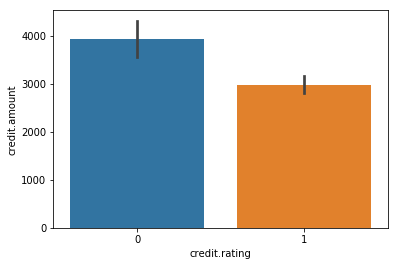

In [8]:
import seaborn as sns
sns.barplot(x='credit.rating',y='credit.amount', data=df)

/Users/vladimiralencar/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/vladimiralencar/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


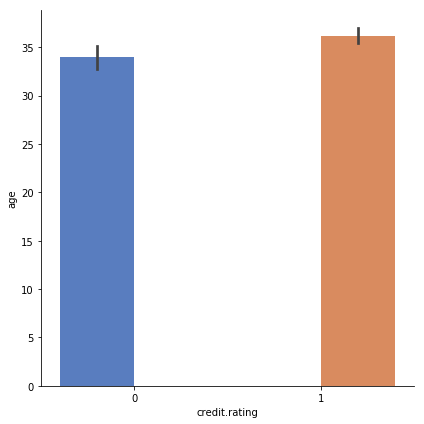

In [9]:
sns.factorplot(x='credit.rating', y='age', hue='credit.rating', data=df,
                   size=6, kind="bar", palette="muted")

In [10]:
df.age.mean()

35.542

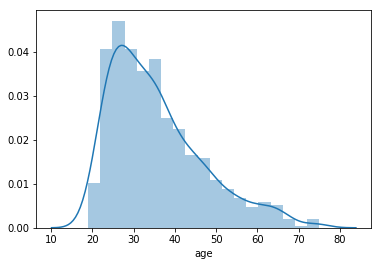

In [11]:
sns.distplot(df.age)

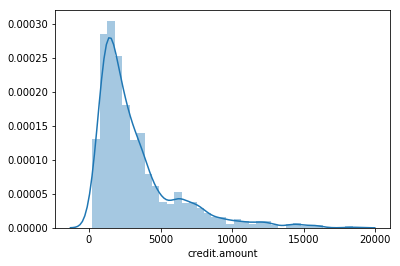

In [12]:
sns.distplot(df['credit.amount']) # quantidade de crédito

## Definindo X e Y

In [13]:
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [14]:
X = df.iloc[:,1:].values.astype(float)
y = df.iloc[:,0]

In [15]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [16]:
X[:3]

array([[   1.,   18.,    3.,    2., 1049.,    1.,    1.,    4.,    1.,
           1.,    4.,    2.,   21.,    2.,    1.,    1.,    3.,    1.,
           1.,    1.],
       [   1.,    9.,    3.,    4., 2799.,    1.,    2.,    2.,    3.,
           1.,    2.,    1.,   36.,    2.,    1.,    2.,    3.,    2.,
           1.,    1.],
       [   2.,   12.,    2.,    4.,  841.,    2.,    3.,    2.,    1.,
           1.,    4.,    1.,   23.,    2.,    1.,    1.,    2.,    1.,
           1.,    1.]])

In [17]:
y[:3]

0    1
1    1
2    1
Name: credit.rating, dtype: int64

## Preparando os dados para aplicar Regressão Logistica<br />
## Colocando os dados em Escala

In [18]:
X.shape

(1000, 20)

In [19]:
standardization  = StandardScaler().fit(X)
Xst = standardization.transform(X)

print('Dataset Original')
X[:5].astype(int)

Dataset Original


array([[   1,   18,    3,    2, 1049,    1,    1,    4,    1,    1,    4,
           2,   21,    2,    1,    1,    3,    1,    1,    1],
       [   1,    9,    3,    4, 2799,    1,    2,    2,    3,    1,    2,
           1,   36,    2,    1,    2,    3,    2,    1,    1],
       [   2,   12,    2,    4,  841,    2,    3,    2,    1,    1,    4,
           1,   23,    2,    1,    1,    2,    1,    1,    1],
       [   1,   12,    3,    4, 2122,    1,    2,    3,    3,    1,    2,
           1,   39,    2,    1,    2,    2,    2,    1,    2],
       [   1,   12,    3,    4, 2171,    1,    2,    4,    3,    1,    4,
           2,   38,    1,    2,    2,    2,    1,    1,    2]])

In [20]:
print('Dataset Em Escala')
Xst[:5]

Dataset Em Escala


array([[-1.4165, -0.2409,  1.1414, -0.9933, -0.7877, -0.7308, -1.3086,
         0.9185, -1.2863, -0.3202,  1.047 , -0.3411, -1.2816,  0.478 ,
        -1.7512, -0.7614,  0.1469, -0.4283, -0.8233, -0.196 ],
       [-1.4165, -0.9876,  1.1414,  1.0654, -0.1674, -0.7308, -0.4036,
        -0.8702,  0.5888, -0.3202, -0.766 , -1.2937,  0.0404,  0.478 ,
        -1.7512,  1.3133,  0.1469,  2.3349, -0.8233, -0.196 ],
       [-0.2191, -0.7387, -0.4708,  1.0654, -0.8614,  0.1054,  0.5013,
        -0.8702, -1.2863, -0.3202,  1.047 , -1.2937, -1.1053,  0.478 ,
        -1.7512, -0.7614, -1.3838, -0.4283, -0.8233, -0.196 ],
       [-1.4165, -0.7387,  1.1414,  1.0654, -0.4073, -0.7308, -0.4036,
         0.0241,  0.5888, -0.3202, -0.766 , -1.2937,  0.3048,  0.478 ,
        -1.7512,  1.3133, -1.3838,  2.3349, -0.8233,  5.1017],
       [-1.4165, -0.7387,  1.1414,  1.0654, -0.39  , -0.7308, -0.4036,
         0.9185,  0.5888, -0.3202,  1.047 , -0.3411,  0.2166, -2.092 ,
         0.1359,  1.3133, -1.3838, -0.

## Aplicando o Algoritmo

In [21]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(Xst, y)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Avaliando A Acurácia do Modelo

In [22]:
# check the accuracy on the training set
model.score(Xst, y)

0.775

### Examinando os Coeficientes

In [23]:
cols = df.columns.values
cols

array(['credit.rating', 'account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose',
       'credit.amount', 'savings', 'employment.duration',
       'installment.rate', 'marital.status', 'guarantor',
       'residence.duration', 'current.assets', 'age', 'other.credits',
       'apartment.type', 'bank.credits', 'occupation', 'dependents',
       'telephone', 'foreign.worker'], dtype=object)

In [24]:
cols_atributos = cols[1:]
cols_atributos

array(['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose',
       'credit.amount', 'savings', 'employment.duration',
       'installment.rate', 'marital.status', 'guarantor',
       'residence.duration', 'current.assets', 'age', 'other.credits',
       'apartment.type', 'bank.credits', 'occupation', 'dependents',
       'telephone', 'foreign.worker'], dtype=object)

In [25]:
len(cols_atributos)

20

In [26]:
model.coef_[0]

array([ 0.6706, -0.2767,  0.3611, -0.3578, -0.3075,  0.3676,  0.2054,
       -0.2925,  0.2004,  0.0943, -0.0396, -0.2442,  0.099 ,  0.1417,
        0.149 , -0.0879, -0.0304, -0.0536,  0.1669,  0.2456])

In [27]:
len(model.coef_[0])

20

In [28]:
# examine the coefficients
elementos = [[x,y] for x, y in zip(cols_atributos, model.coef_[0])]
elementos

[['account.balance', 0.6706422196200341],
 ['credit.duration.months', -0.27669158436952523],
 ['previous.credit.payment.status', 0.3611194071799875],
 ['credit.purpose', -0.3577791330647178],
 ['credit.amount', -0.30747000821433057],
 ['savings', 0.36762450373956423],
 ['employment.duration', 0.2053668963550472],
 ['installment.rate', -0.29253094669308655],
 ['marital.status', 0.20036285645183424],
 ['guarantor', 0.09426169574848973],
 ['residence.duration', -0.03960406900848037],
 ['current.assets', -0.24420229425865883],
 ['age', 0.09899829241768389],
 ['other.credits', 0.1417096742671957],
 ['apartment.type', 0.14903121150883666],
 ['bank.credits', -0.08787836059911988],
 ['occupation', -0.030444834205835315],
 ['dependents', -0.053602809318327733],
 ['telephone', 0.1668626254690643],
 ['foreign.worker', 0.24558816698411934]]

In [29]:
# examine the coefficients
pd.DataFrame(elementos, columns=['Atributo', 'Coeficiente'])

,Atributo,Coeficiente
0,account.balance,0.670642
1,credit.duration.months,-0.276692
2,previous.credit.payment.status,0.361119
3,credit.purpose,-0.357779
4,credit.amount,-0.307470
5,savings,0.367625
6,employment.duration,0.205367
7,installment.rate,-0.292531
8,marital.status,0.200363
9,guarantor,0.094262


## Avaliando o modelo usando split de dados

In [30]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xst, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
model2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
# predict class labels for the test set
y_predicted = model2.predict(X_test)
print (y_predicted[:5])

[1 0 1 1 0]


In [32]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs[:5])

[[0.3461 0.6539]
 [0.5058 0.4942]
 [0.1349 0.8651]
 [0.0987 0.9013]
 [0.503  0.497 ]]


In [33]:
print('Valores Previstos e suas Probalidades')
elementos = [[x,y] for x, y in zip(y_predicted,probs)]
elementos
df2 = pd.DataFrame(elementos, columns=['Classe', 'Probabilidade'])
df2.head(10)

Valores Previstos e suas Probalidades


,Classe,Probabilidade
0,1,"[0.3461401531509519, 0.6538598468490481]"
1,0,"[0.5057661375308897, 0.4942338624691102]"
2,1,"[0.13488830921011474, 0.8651116907898853]"
3,1,"[0.09869361786030684, 0.9013063821396932]"
4,0,"[0.503048353413627, 0.496951646586373]"
5,0,"[0.5962526750232171, 0.40374732497678284]"
6,1,"[0.0632676485917445, 0.9367323514082555]"
7,1,"[0.14762673286171524, 0.8523732671382848]"
8,1,"[0.12703997138673007, 0.8729600286132699]"
9,1,"[0.09170745759387333, 0.9082925424061267]"


In [34]:
# generate evaluation metrics
print ('Acurácia: ', metrics.accuracy_score(y_test, y_predicted))

Acurácia:  0.7466666666666667


## Avaliando o modelo usando Cross-validation

In [35]:
from sklearn import model_selection
num_folds = 10
num_instances = len(X)
seed = 7

modelo = LogisticRegression()

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, 
                                            scoring='accuracy')

# Print do resultado
print("Accuracy: %.3f (%.3f)" % (resultado.mean(), resultado.std()))
print(resultado)

Accuracy: 0.759 (0.030)
[0.76 0.76 0.79 0.78 0.7  0.76 0.77 0.76 0.71 0.8 ]


## Realizando Previsões

In [36]:
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [37]:
df.loc[0,:].values

array([   1,    1,   18,    3,    2, 1049,    1,    1,    4,    1,    1,
          4,    2,   21,    2,    1,    1,    3,    1,    1,    1])

In [38]:
df['account.balance'].value_counts()

3    457
1    274
2    269
Name: account.balance, dtype: int64

In [39]:
df.savings.value_counts()

1    603
4    183
3    111
2    103
Name: savings, dtype: int64

In [40]:
Xprev1 = np.array([3,   18,    3,    3, 1049,    1,    4,    4,    1,    1,
          4,    2,   21,    2,    1,    1,    3,    1,    1,    1])
Xprev1

array([   3,   18,    3,    3, 1049,    1,    4,    4,    1,    1,    4,
          2,   21,    2,    1,    1,    3,    1,    1,    1])

In [41]:
Xprev1 = Xprev1.reshape(1, -1)
Xprev1

array([[   3,   18,    3,    3, 1049,    1,    4,    4,    1,    1,    4,
           2,   21,    2,    1,    1,    3,    1,    1,    1]])

In [42]:
model.predict(Xprev1)

array([0])

In [43]:
model.predict_proba(Xprev1)

array([[1., 0.]])

In [44]:
df.loc[100,:].values

array([   1,    3,   24,    3,    2, 3777,    3,    2,    4,    3,    1,
          4,    1,   40,    2,    2,    1,    3,    1,    2,    1])

In [45]:
Xprev2 = np.array([ 3,   24,    3,    2, 3777,    3,    2,    4,    3,    1,
          4,    1,   40,    2,    2,    1,    3,    1,    2,    1])
Xprev2

array([   3,   24,    3,    2, 3777,    3,    2,    4,    3,    1,    4,
          1,   40,    2,    2,    1,    3,    1,    2,    1])

In [46]:
Xprev2 = Xprev2.reshape(1, -1)
Xprev2

array([[   3,   24,    3,    2, 3777,    3,    2,    4,    3,    1,    4,
           1,   40,    2,    2,    1,    3,    1,    2,    1]])

In [47]:
model.predict(Xprev2)

array([0])

In [48]:
model.predict_proba(Xprev2)[:5]

array([[1., 0.]])

In [49]:
df.loc[5,:].values

array([   1,    1,   10,    3,    4, 2241,    1,    1,    1,    3,    1,
          3,    1,   48,    2,    1,    2,    2,    2,    1,    2])

In [50]:
Xprev = np.array([1,   10,    3,    4, 2241,    1,    1,    1,    3,    1,
          3,    1,   48,    2,    1,    2,    2,    2,    1,    2])
Xprev

array([   1,   10,    3,    4, 2241,    1,    1,    1,    3,    1,    3,
          1,   48,    2,    1,    2,    2,    2,    1,    2])

In [51]:
Xprev = Xprev.reshape(1, -1)
Xprev

array([[   1,   10,    3,    4, 2241,    1,    1,    1,    3,    1,    3,
           1,   48,    2,    1,    2,    2,    2,    1,    2]])

In [52]:
# aplicando o modelo de Regressão Logística
model.predict(Xprev)

array([0])

In [53]:
model.predict_proba(Xprev)

array([[1., 0.]])

In [54]:
df.loc[950,:].values

array([   0,    2,   45,    3,    3, 4746,    1,    1,    4,    3,    1,
          2,    2,   24,    1,    2,    2,    2,    1,    1,    1])

In [55]:
Xprev3 = np.array([2,   45,    3,    3, 4746,    1,    1,    4,    3,    1,
          2,    2,   24,    1,    2,    2,    2,    1,    1,    1])
Xprev3

array([   2,   45,    3,    3, 4746,    1,    1,    4,    3,    1,    2,
          2,   24,    1,    2,    2,    2,    1,    1,    1])

In [56]:
Xprev3 = Xprev3.reshape(1, -1)
Xprev3

array([[   2,   45,    3,    3, 4746,    1,    1,    4,    3,    1,    2,
           2,   24,    1,    2,    2,    2,    1,    1,    1]])

In [57]:
# aplicando o modelo de Regressão Logística
model.predict(Xprev3)

array([0])

In [58]:
model.predict_proba(Xprev3)

array([[1., 0.]])

# Métricas para Algorítmos de Classificação

### carregando o dataset

In [59]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [60]:
df = pd.read_csv('credit_dataset_final.csv')
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [61]:
X = df.iloc[:,1:].values.astype(float)
y = Y =  df.iloc[:,0]

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


## Acurácia
Número de previsões corretas. <br />
É útil apenas quando existe o mesmo número de observações em cada classe.

In [62]:
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

Acurácia: 0.759 (0.030)


## Curva ROC 
A Curva ROC permite analisar a métrica AUC (Area Under the Curve).<br />
Essa é uma métrica de performance para classificação binária, em que podemos definir as classes 
em positivas e negativas. <br />
Problemas de classificação binária são um trade-off sentre Sensitivity e Specifity. <br />
Sensitivity é a taxa de verdadeiros positivos (TP). Esse é o número de instâncias positivas da primeira classe 
que foram previstas corretamente. <br />
Specifity é a taxa de verdadeiros negativos (TN). Esse é o número de instâncias da segunda classe que foram 
previstas corretamente.<br />
Valores acima de 0.5 indicam uma boa taxa de previsão.

In [63]:
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print("AUC: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

AUC: 0.778 (0.041)


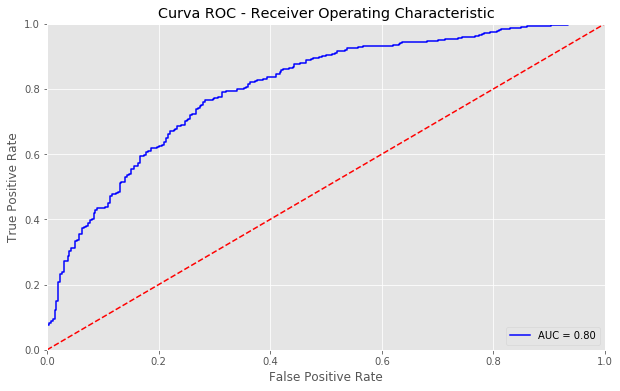

In [64]:
modelo = LogisticRegression()
modelo.fit(X,y)
# calculate the fpr and tpr for all thresholds of the classification
probs = modelo.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.title('Curva ROC - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logarithmic Loss
Avalia as previsões de probabilidade de um membro pertencer a uma determinada classe.<br />
Valores menores indicam boa performance, com 0 representando um perfeito logloss.<br /> 
A função cross_val_score() inverte o valor.

In [65]:
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold, scoring = 'neg_log_loss')

# Print do resultado
print("Logloss: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

Logloss: -0.502 (0.035)


## Confusion Matrix
Permite verificar a acurácia de um modelo com duas ou mais classes

In [66]:
from sklearn.metrics import confusion_matrix
# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)


matrix = confusion_matrix(Y_teste, model.predict(X_teste))

# Imprimindo a Confusion Matrix
print(matrix)

[[ 43  62]
 [ 16 209]]


Matriz de Confusão


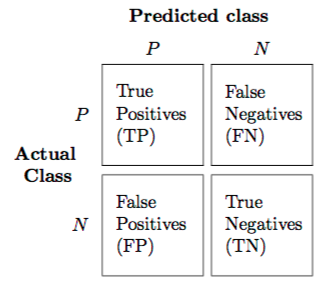

In [67]:
from IPython.display import Image
print("Matriz de Confusão")
Image("confusion_matrix.png")

## Relatório de Classificação

Precision: Qual a proporção de instâncias classificadas como positivas, foram classificadas como corretas? <br />
$\text{Precision} = \frac{TP}{TP+FP}$
<br /><br />
Recall: Qual a proporção de instâncias positivas, foram identificadas como corretas?<br />
$\text{Recall} = \frac{TP}{TP+FN}$
<br /><br />
f1-score: f1-score combina as métricas de precision e recall<br /><br />
$\text{f1-score} = \frac{2 * (precision * recall)}{(precision + recall)}$
<br /><br />
O f1-score pode ser interpretado com a média ponderada entre precision e recall,<br />
onde o f1-score encontra seu melhor valor ao atingir 1, e seu pior valor ao atingir 0<br /><br />
Support: Número de instâncias

## Relatório de Classificação

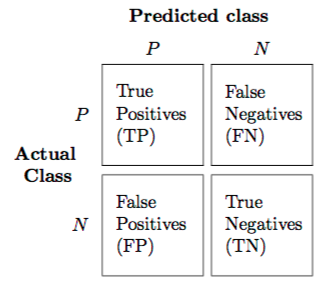

In [68]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = model.predict(X_teste)
report = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
Image("confusion_matrix.png", width=250, height=250)

$\text{Precision} = \frac{TP}{TP+FP}$  $ | \text{Recall} = \frac{TP}{TP+FN}$

In [69]:
print(report);print('matriz de confusão:\n', matrix)

              precision    recall  f1-score   support

           0       0.73      0.41      0.52       105
           1       0.77      0.93      0.84       225

   micro avg       0.76      0.76      0.76       330
   macro avg       0.75      0.67      0.68       330
weighted avg       0.76      0.76      0.74       330

matriz de confusão:
 [[ 43  62]
 [ 16 209]]
